# What are the best times on any day of the week to commute to/from work for a specific commute.

*Team Name: Data Ninjas

*Teammates: Molly Cox, Melissa Wright, Kat Anggasastra, Sreeteja Bollepalli

In [1]:
%matplotlib inline

In [4]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import csv 

#import another matplotlib for changing font size of graph 
from matplotlib.font_manager import FontProperties

#Cool Map Imports to get the maps to show up. 
import gmaps
import gmaps.datasets
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Sreeteja")

# Google developer API key
from config import gkey

# Configure gmaps
#gmaps.configure(api_key=gkey)

ModuleNotFoundError: No module named 'gmaps'

In [5]:
#Script to get the map to show
#sources: https://stackoverflow.com/questions/13686001/python-module-for-getting-latitude-and-longitude-from-the-name-of-a-us-city
#sources: https://geopy.readthedocs.io/en/stable/
#**You must run this in your Terminal**  jupyter nbextension enable --py gmaps

#print(home.raw)
home = geolocator.geocode(home_location)

#print(work.raw)
work = geolocator.geocode(work_location)

#Get the Lattitudes and Longitudes for the map
home_coord = (home.latitude, home.longitude)
work_coord = (work.latitude, work.longitude)
#Display the Map
fig = gmaps.figure()
directions = gmaps.directions_layer(home_coord, work_coord)
fig.add_layer(directions)
fig

NameError: name 'geolocator' is not defined

In [6]:
csv_to_work = pd.read_csv("commute_to_work.csv")
csv_to_home = pd.read_csv("commute_to_home.csv")

In [7]:
csv_to_work["Commute Time"] = round(csv_to_work["Commute Time"]/60)
csv_to_work

,Unnamed: 0,Epoch Time,Commute Time,Commute Date,Commute Start,Commute Name
0,0,1583154000,42.0,3/2/2020,5,Moffett Field to Salesforce Tower
1,1,1583157600,46.0,3/2/2020,6,Moffett Field to Salesforce Tower
2,2,1583161200,64.0,3/2/2020,7,Moffett Field to Salesforce Tower
3,3,1583164800,74.0,3/2/2020,8,Moffett Field to Salesforce Tower
4,4,1583168400,63.0,3/2/2020,9,Moffett Field to Salesforce Tower
5,5,1583172000,54.0,3/2/2020,10,Moffett Field to Salesforce Tower
6,6,1583175600,50.0,3/2/2020,11,Moffett Field to Salesforce Tower
7,7,1583179200,48.0,3/2/2020,12,Moffett Field to Salesforce Tower
8,8,1583240400,42.0,3/3/2020,5,Moffett Field to Salesforce Tower
9,9,1583244000,46.0,3/3/2020,6,Moffett Field to Salesforce Tower


<function matplotlib.pyplot.show(*args, **kw)>

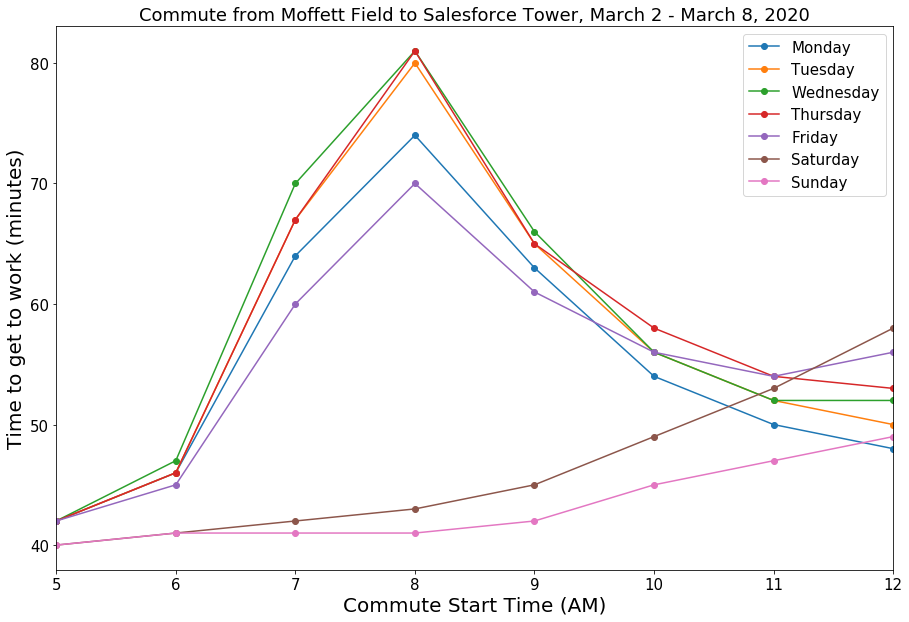

In [32]:
#plot Monday - Sunday Data 
fig, ax = plt.subplots(figsize=(15,10))

work_line = csv_to_work.groupby("Commute Date").plot(x="Commute Start", y="Commute Time", ax=ax, marker = 'o', fontsize="15")
plt.xlim(5,12)
plt.title("Commute from Moffett Field to Salesforce Tower, March 2 - March 8, 2020", fontsize = '18')
plt.xlabel("Commute Start Time (AM)", fontsize = "20")
plt.ylabel("Time to get to work (minutes)", fontsize = "20")
plt.legend(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize = '15')
plt.savefig("images/ daily work commute by hour(PM).png")
plt.show


In [9]:
csv_to_home["Commute Time"] = round(csv_to_home["Commute Time"]/60)
csv_to_work

,Unnamed: 0,Epoch Time,Commute Time,Commute Date,Commute Start,Commute Name
0,0,1583154000,42.0,3/2/2020,5,Moffett Field to Salesforce Tower
1,1,1583157600,46.0,3/2/2020,6,Moffett Field to Salesforce Tower
2,2,1583161200,64.0,3/2/2020,7,Moffett Field to Salesforce Tower
3,3,1583164800,74.0,3/2/2020,8,Moffett Field to Salesforce Tower
4,4,1583168400,63.0,3/2/2020,9,Moffett Field to Salesforce Tower
5,5,1583172000,54.0,3/2/2020,10,Moffett Field to Salesforce Tower
6,6,1583175600,50.0,3/2/2020,11,Moffett Field to Salesforce Tower
7,7,1583179200,48.0,3/2/2020,12,Moffett Field to Salesforce Tower
8,8,1583240400,42.0,3/3/2020,5,Moffett Field to Salesforce Tower
9,9,1583244000,46.0,3/3/2020,6,Moffett Field to Salesforce Tower


<function matplotlib.pyplot.show(*args, **kw)>

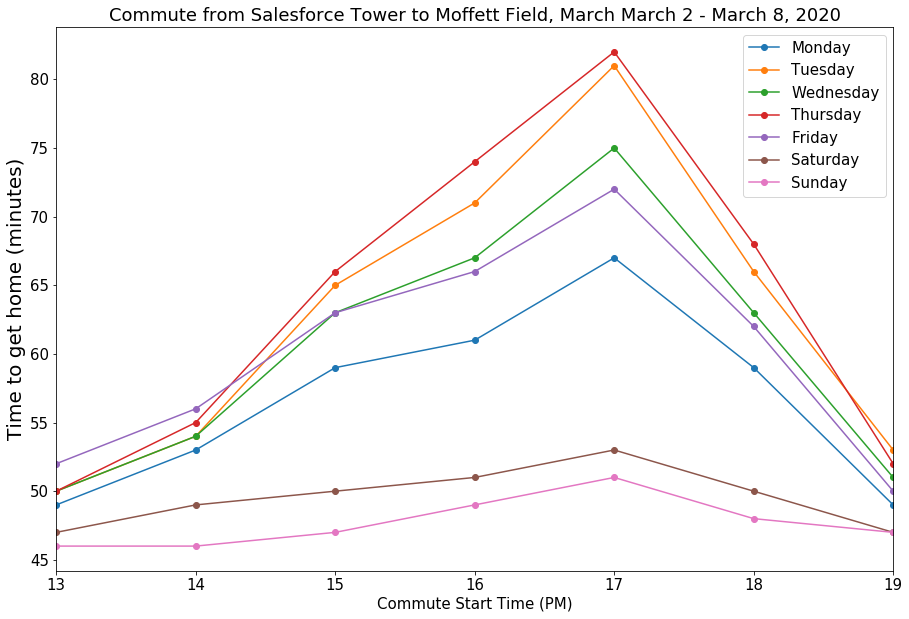

In [33]:
# plot Monday - Sunday Data 1pm - 7pm
fig, ax = plt.subplots(figsize=(15,10))

csv_to_home.groupby("Commute Date").plot(x="Commute Start", y="Commute Time", ax=ax, marker="o", fontsize = '15')
plt.xlim(13, 19
        )
plt.title("Commute from Salesforce Tower to Moffett Field, March March 2 - March 8, 2020", fontsize = '18')
plt.xlabel("Commute Start Time (PM)", fontsize = '15')
plt.ylabel("Time to get home (minutes)", fontsize = '20')
plt.legend(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize = '15')
plt.savefig("images/ daily home commute by hour(PM).png")
plt.show

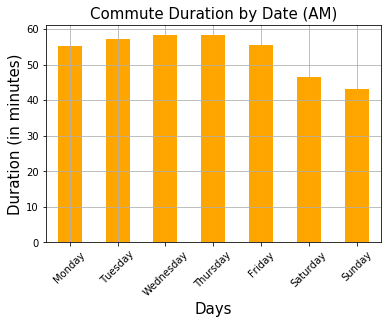

In [11]:
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
work_group = csv_to_work.groupby("Commute Date")
work_trips = work_group["Commute Time"].mean()
work_chart = work_trips.plot(kind="bar", color ='orange', rot = 45)
work_chart.set_title("Commute Duration by Date (AM)", fontsize='15')
work_chart.set_xlabel("Days", fontsize = '15')
work_chart.set_ylabel("Duration (in minutes)", fontsize = '15')
work_chart.grid(b=True)
work_chart.set_xticklabels(days_of_week)

#Save the figure
plt.savefig("images/Commute duration by Date (AM).png")

# Create a bar chart based upon the above data
plt.show()

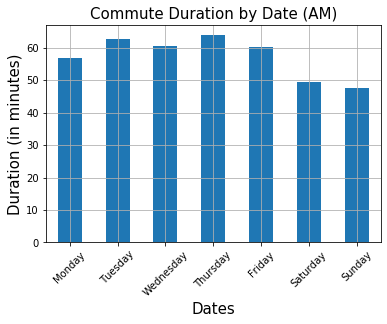

In [12]:
#set our travel days
home_group = csv_to_home.groupby("Commute Date")
home_trips = home_group["Commute Time"].mean()
home_chart = home_trips.plot(kind="bar", rot = 45)
home_chart.set_title("Commute Duration by Date (AM)", fontsize='15')
home_chart.set_xlabel("Dates", fontsize='15')
home_chart.set_ylabel("Duration (in minutes)", fontsize='15')
home_chart.grid(b=True)
home_chart.set_xticklabels(days_of_week)

#Save the figure
plt.savefig("images/Commute duration by Date (PM).png")

# Create a bar chart based upon the above data
plt.show()

In [13]:
work_data = csv_to_work.groupby(["Commute Start", "Commute Date"]).agg({"Commute Time": "mean"})
reformat_data = work_data.unstack()
reformat_data

Commute Time                                               \
Commute Date      3/2/2020 3/3/2020 3/4/2020 3/5/2020 3/6/2020 3/7/2020   
Commute Start                                                             
5                     42.0     42.0     42.0     42.0     42.0     40.0   
6                     46.0     46.0     47.0     46.0     45.0     41.0   
7                     64.0     67.0     70.0     67.0     60.0     42.0   
8                     74.0     80.0     81.0     81.0     70.0     43.0   
9                     63.0     65.0     66.0     65.0     61.0     45.0   
10                    54.0     56.0     56.0     58.0     56.0     49.0   
11                    50.0     52.0     52.0     54.0     54.0     53.0   
12                    48.0     50.0     52.0     53.0     56.0     58.0   

                        
Commute Date  3/8/2020  
Commute Start           
5                 40.0  
6                 41.0  
7                 41.0  
8                 41.0  
9                 42.0  
10                45.0  
11                47.0  
12                49.0

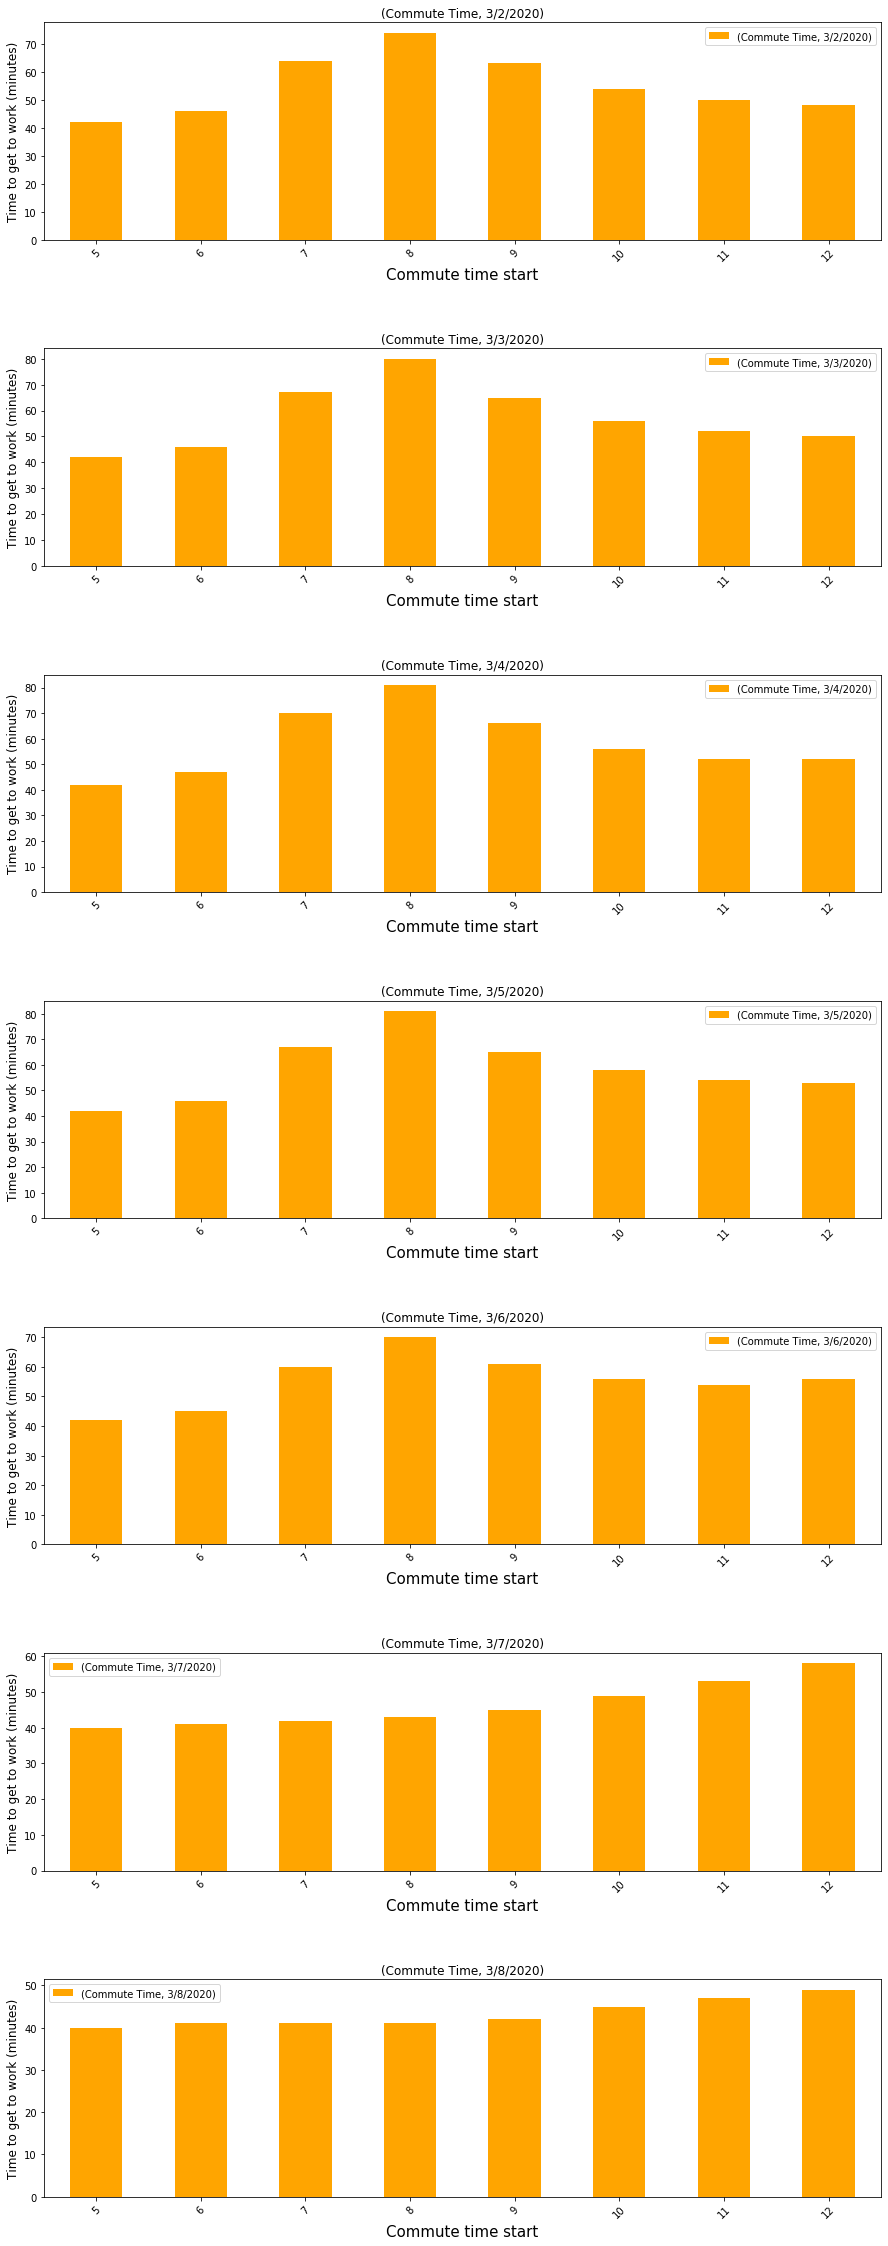

In [17]:
# Create 7 bar charts, one for each day of week, with start times we have stored as x-axis 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

work_bar_chart = reformat_data.plot.bar(figsize=(15,40), rot=45, subplots=True, sharex=False, color="orange")
plt.subplots_adjust(hspace = 0.5)
for i in work_bar_chart:
    i.set_ylabel("Time to get to work (minutes)", fontsize = '12')
    i.set_xlabel("Commute time start", fontsize ='15')
    
plt.savefig("images/ work commute by hour(AM).png")   

In [15]:
#reformat our data and plot it as using subplot functions 

home_data = csv_to_home.groupby(["Commute Start", "Commute Date"]).agg({"Commute Time": "mean"})
reformat_home_data = home_data.unstack()
reformat_home_data

Commute Time                                               \
Commute Date      3/2/2020 3/3/2020 3/4/2020 3/5/2020 3/6/2020 3/7/2020   
Commute Start                                                             
13                    49.0     50.0     50.0     50.0     52.0     47.0   
14                    53.0     54.0     54.0     55.0     56.0     49.0   
15                    59.0     65.0     63.0     66.0     63.0     50.0   
16                    61.0     71.0     67.0     74.0     66.0     51.0   
17                    67.0     81.0     75.0     82.0     72.0     53.0   
18                    59.0     66.0     63.0     68.0     62.0     50.0   
19                    49.0     53.0     51.0     52.0     50.0     47.0   

                        
Commute Date  3/8/2020  
Commute Start           
13                46.0  
14                46.0  
15                47.0  
16                49.0  
17                51.0  
18                48.0  
19                47.0

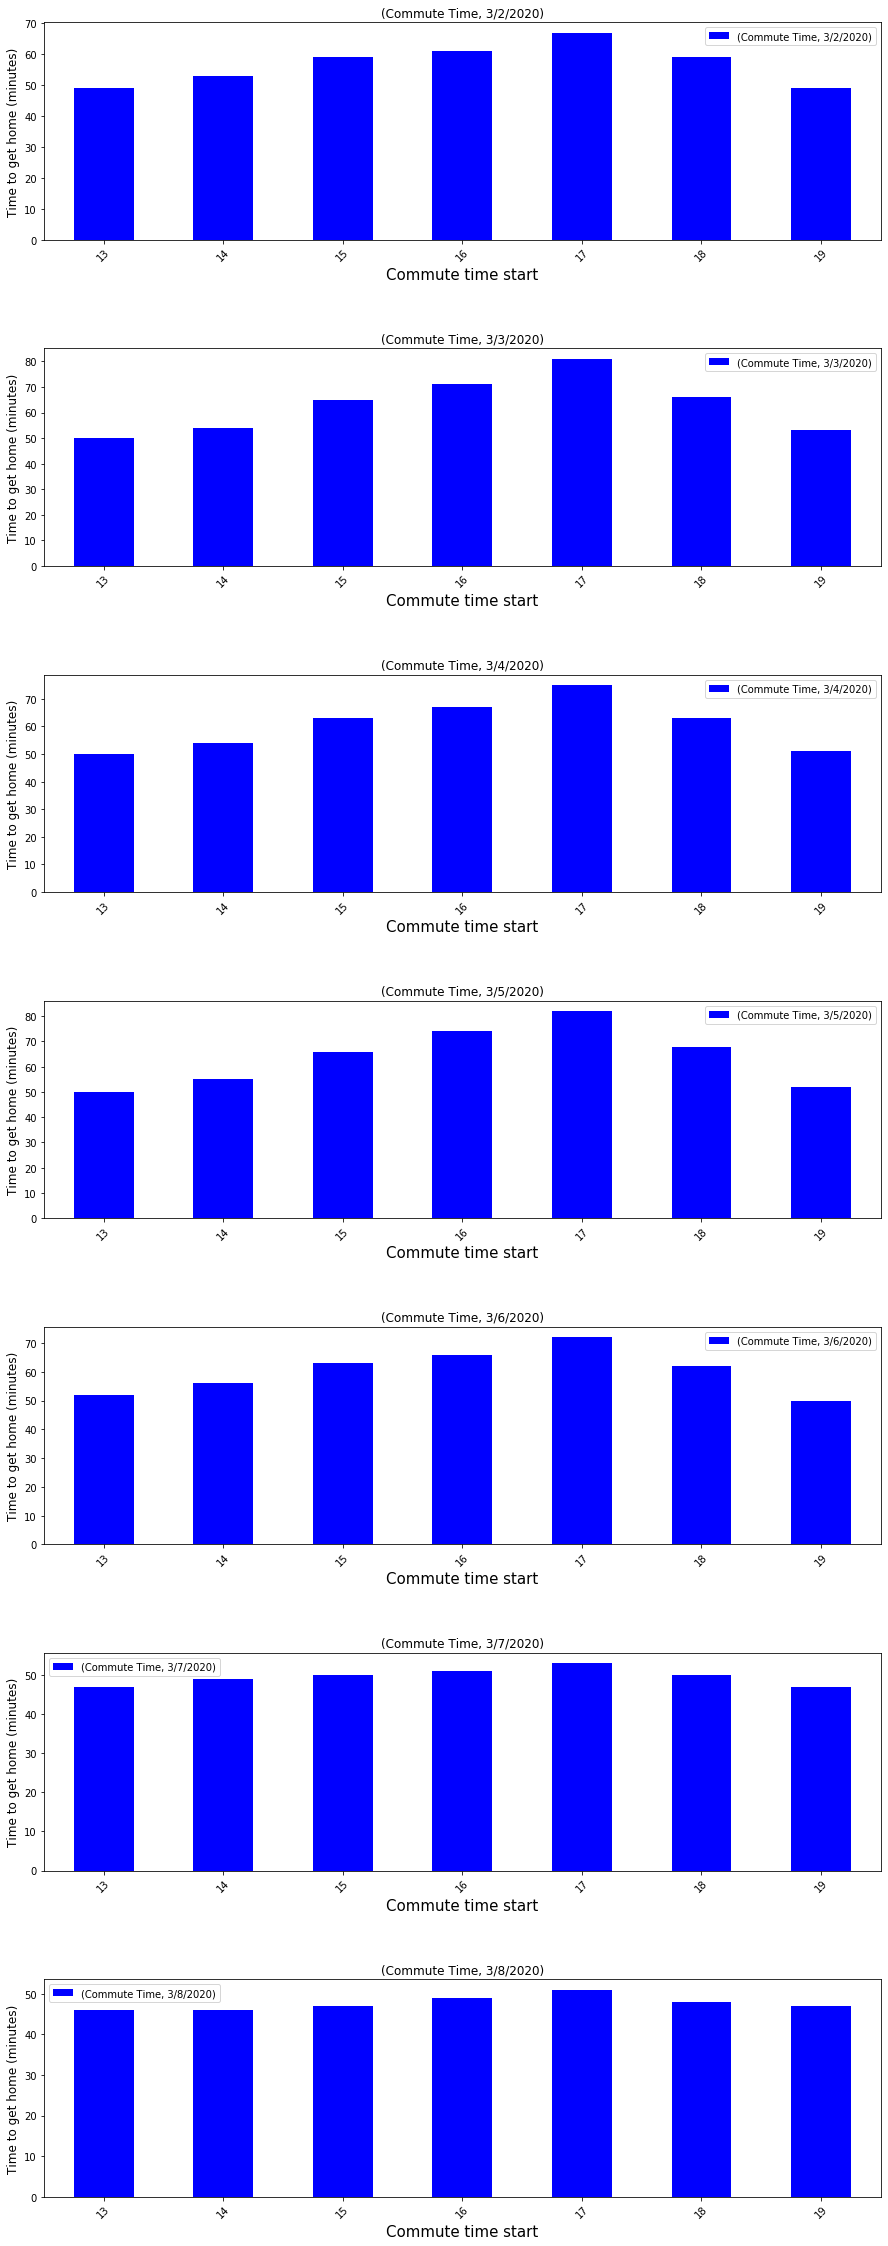

In [16]:
#https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html

home_bar_chart = reformat_home_data.plot.bar(figsize= (15,40), rot=45, subplots=True, sharex=False, color ="blue")
plt.subplots_adjust(hspace = 0.5)
for i in home_bar_chart:
    i.set_ylabel("Time to get home (minutes)", fontsize = '12')
    i.set_xlabel("Commute time start", fontsize ='15')

plt.savefig("images/ home commute by hour(PM).png")  